## Exercise 6: Solving Exercise 5 Numerically

In this assignment, we will
1. Learn an utilize Euler's Method to find position and velocity.
2. Compare analytical and computational solutions.
3. Add additional forces to our model.

#### Contributors:
- Matrim Cirullo-Nesbitt
- Abhishek Vilekar
- Andrew Gabaldon

#### Given Values:
- Mass $m = 0.2$ kg
- Acceleration $g=9.81$ $\frac{\text{m}}{\text{s}^2}$
- $y(0) = 2$ m
- $\vec{v}(0) = <10,10>$ m/s

We want to find a reasonable value for $D$, and we need to choose an initial time and step size $\Delta t$. We define $\Delta t = \frac{t_{final}-t_0}{N}$, where $t_0$ is our initial time, $t_{final}$ is the time it takes for the ball to reach the ground for the first time, and $N$ is the number of steps we take.
We take 0.2 for $D$, as an online search renders a result of $0.005 = D/m \Rightarrow D = 0.2$.


#### 6a
Set up arrays for time, velocity, acceleration and positions for the results from exercise 5. Define an initial and final time. Choose the final time to be the time when the ball hits the ground for the first time. Make a plot of the position and velocity as functions of time. Here you could set the initial velocity in the $y$-direction to zero and use the result from exercise 5. Else you need to try different initial times using the result from exercise 5 as a starting guess. It is not critical if you don’t reach the ground when the initial velocity in the $y$-direction is not zero.

We use the formula for positions, velocities, and accelerations in the $y$-drection,
$$\ddot{y}(t) = g(\tanh^2(t\sqrt{\frac{gD}{m}})-1)$$
$$\dot{y}(t) = \sqrt{\frac{mg}{D}}\tanh(t\sqrt{\frac{gD}{m}})$$
$$y(t) = \frac{m}{D}\ln(\cosh(t\sqrt{\frac{gD}{m}}))$$

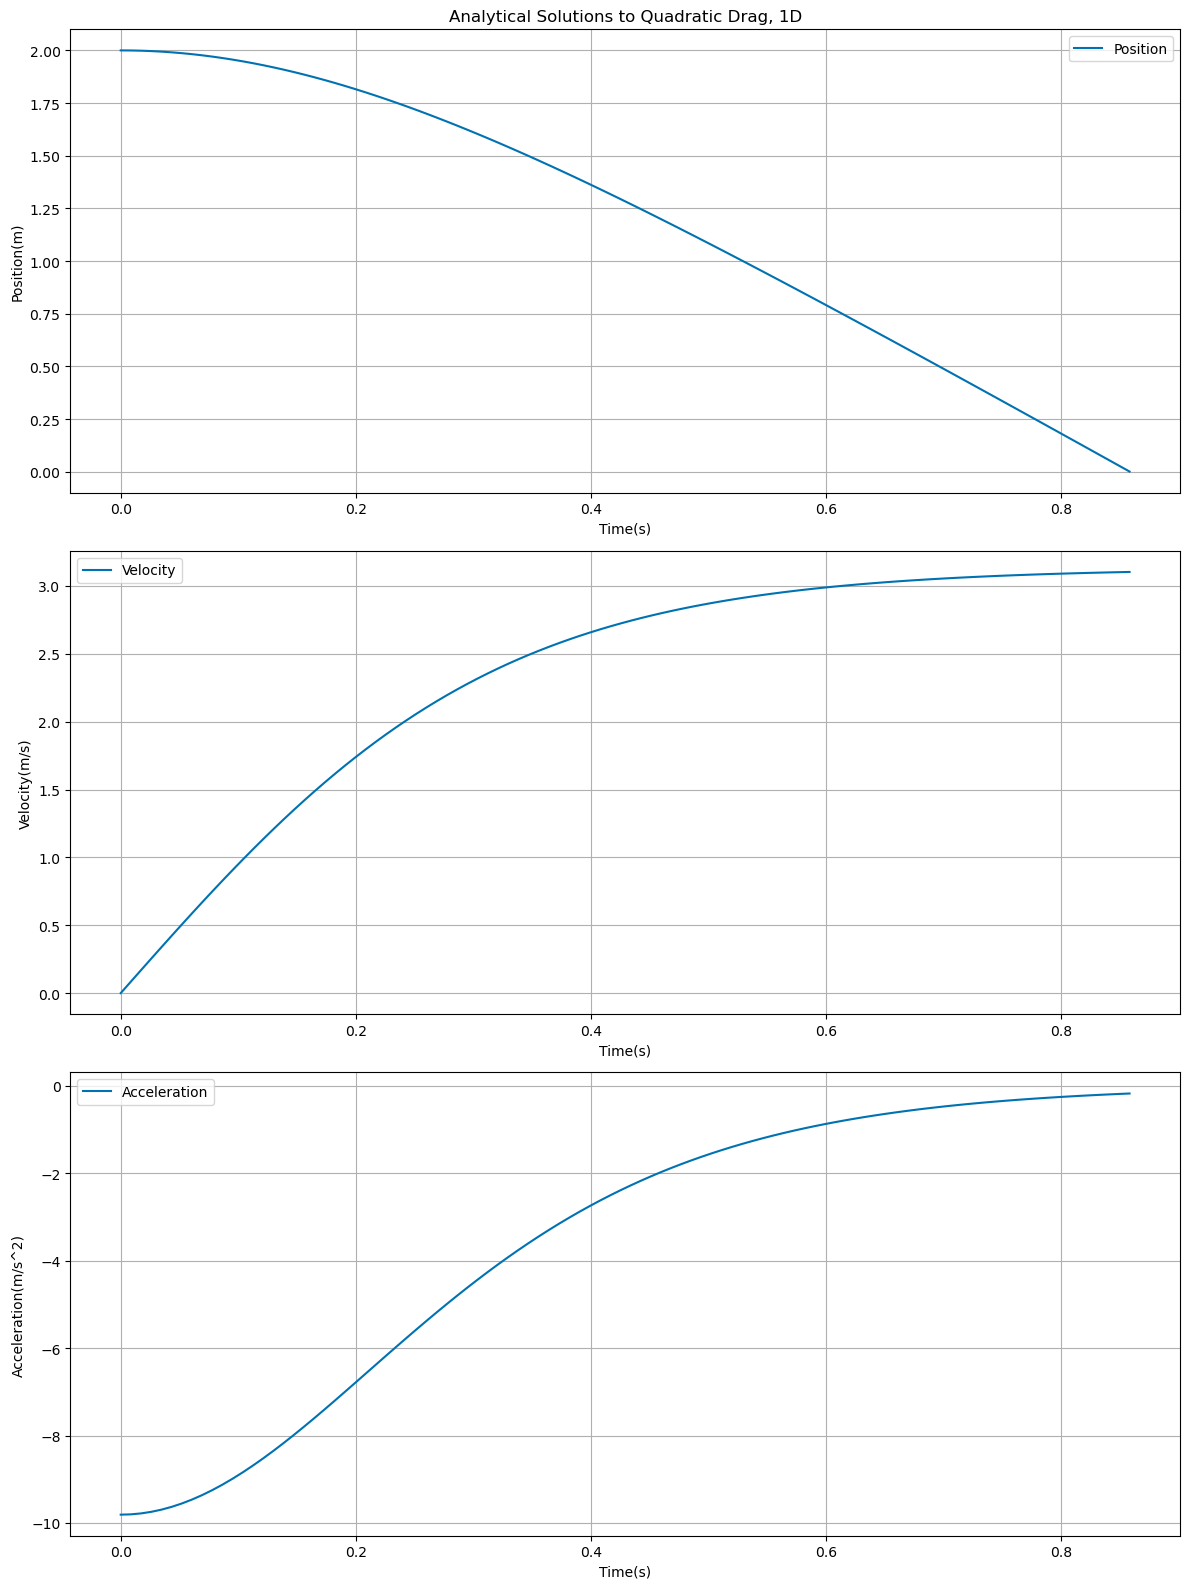

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-colorblind')

#Initialize given variables
m = 0.2
g = 9.81
D = 0.2
t_0 = 0
t_f = 0.858
N = 100
t_aray,dt = np.linspace(t_0,t_f,N,endpoint=True,retstep=True)
#gives 99 values between t_0 and t_f, along with t_f at 
# the end, and retstep=True outputs the step size to
# dt.

y_pos_aray = np.zeros(N)
x_pos_aray = np.zeros(N)
y_vel_aray = np.zeros(N)
x_vel_aray = np.zeros(N)
y_acc_aray = np.zeros(N)
x_acc_aray = np.zeros(N)

y_pos_aray[0] = 2
y_acc_aray[0] = -g + -(D*y_vel_aray[0]*np.sqrt(y_vel_aray[0]**2+x_vel_aray[0]**2))/m


assert len(x_acc_aray) == 100
assert x_acc_aray[99] == 0
assert dt == abs((t_f-t_0)/99), "dt does not agree with theory!"
assert t_aray[0] == 0 and t_aray[99] == t_f, "Initial and final values of t_aray do not agree with construction!"
#assertions to catch easy errors.

#We do math now!

for i in range(1,N):
    y_pos_aray[i] = -(m/D)*np.log(np.cosh(t_aray[i]*np.sqrt(g*D/m)))+2
    y_acc_aray[i] = g*((np.tanh(t_aray[i]*np.sqrt(g*D/m)))**2-1)
    y_vel_aray[i] = np.sqrt(m*g/D)*np.tanh(t_aray[i]*np.sqrt(g*D/m))
    #analytical solutions to ex. 5
#for loop that updates our initialized arrays with our true and real


#plot them
fig, ax = plt.subplots(3,1,figsize=(12,16))

ax[0].set_title("Analytical Solutions to Quadratic Drag, 1D")

ax[0].plot(t_aray,y_pos_aray, label ="Position")
ax[0].set_ylabel("Position(m)")
ax[0].set_xlabel("Time(s)")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t_aray,y_vel_aray, label ="Velocity")
ax[1].set_ylabel("Velocity(m/s)")
ax[1].set_xlabel("Time(s)")
ax[1].legend()
ax[1].grid(True)

ax[2].plot(t_aray,y_acc_aray, label ="Acceleration")
ax[2].set_ylabel("Acceleration(m/s^2)")
ax[2].set_xlabel("Time(s)")
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()

#### 6b 
Write a code which implements Euler’s method and compute numerically and plot the position and velocity as functions of time for various values of $\Delta t$. Comment your results.

We will use these equations to govern our updates:
$$\vec{a}(t+dt) = -g\hat{y}+\frac{D}{m}|\vec{v}(t+dt)|\vec{v}(t+dt)$$
$$\vec{v}(t+dt) = \vec{v}(t) + \vec{a}(t)dt$$
$$\vec{r}(t+dt) = \vec{r}(t) + \vec{v}(t)dt$$

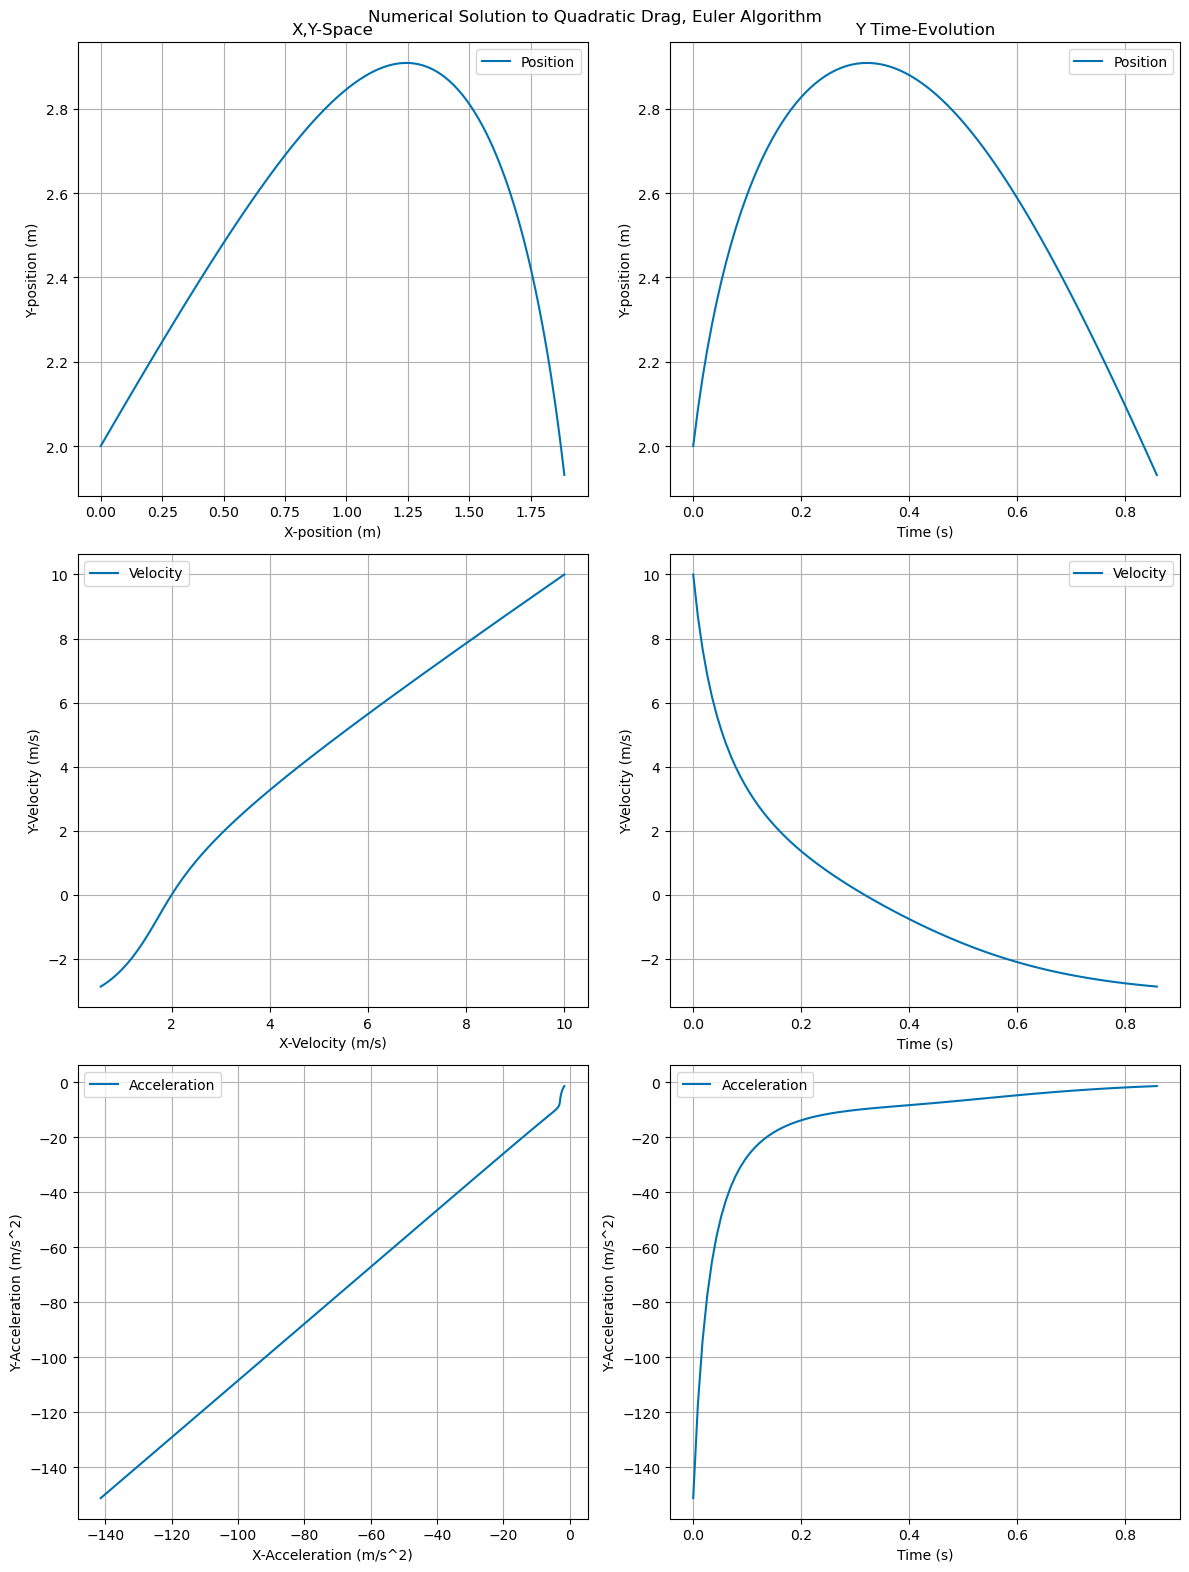

In [33]:
#Initialize given variables
m = 0.2
g = 9.81
D = 0.2
t_0 = 0
t_f = 0.858
N = 100
t_aray,dt = np.linspace(t_0,t_f,N,endpoint=True,retstep=True)
#gives 99 values between t_0 and t_f, along with t_f at 
# the end, and retstep=True outputs the step size to
# dt.

r_aray = np.zeros((N,2))
v_aray = np.zeros((N,2))
a_aray = np.zeros((N,2))

r_aray[0] = [0,2]
v_aray[0] = [10,10]
a_aray[0] = [(-D*np.linalg.norm(v_aray[0])*v_aray[0][0])/m,
             -g-(D*np.linalg.norm(v_aray[0])*v_aray[0][1])/m]
#Define acceleration function
def a_vec(v_vec):
    return [
        -D*np.linalg.norm(v_vec)*v_vec[0]*(1/m),
        -g + -D*np.linalg.norm(v_vec)*v_vec[1]*(1/m)
        ]

for i in range(1,N):
    r_aray[i] = r_aray[i-1]+v_aray[i-1]*dt
    v_aray[i] = v_aray[i-1]+a_aray[i-1]*dt
    a_aray[i] = a_vec(v_aray[i])
#for loop that updates our stuff.

r_aray = r_aray.transpose()
v_aray = v_aray.transpose()
a_aray = a_aray.transpose()

#plot them
fig, ax = plt.subplots(3,2,figsize=(12,16))
fig.suptitle("Numerical Solution to Quadratic Drag, Euler Algorithm")

ax[0][0].set_title("X,Y-Space")

ax[0][0].plot(r_aray[0],r_aray[1], label ="Position")
ax[0][0].set_ylabel("Y-position (m)")
ax[0][0].set_xlabel("X-position (m)")
ax[0][0].legend()
ax[0][0].grid(True)

ax[1][0].plot(v_aray[0],v_aray[1], label ="Velocity")
ax[1][0].set_ylabel("Y-Velocity (m/s)")
ax[1][0].set_xlabel("X-Velocity (m/s)")
ax[1][0].legend()
ax[1][0].grid(True)

ax[2][0].plot(a_aray[0],a_aray[1], label ="Acceleration")
ax[2][0].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][0].set_xlabel("X-Acceleration (m/s^2)")
ax[2][0].legend()
ax[2][0].grid(True)

ax[0][1].set_title("Y Time-Evolution")

ax[0][1].plot(t_aray,r_aray[1], label ="Position")
ax[0][1].set_ylabel("Y-position (m)")
ax[0][1].set_xlabel("Time (s)")
ax[0][1].legend()
ax[0][1].grid(True)

ax[1][1].plot(t_aray,v_aray[1], label ="Velocity")
ax[1][1].set_ylabel("Y-Velocity (m/s)")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].legend()
ax[1][1].grid(True)

ax[2][1].plot(t_aray,a_aray[1], label ="Acceleration")
ax[2][1].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][1].set_xlabel("Time (s)")
ax[2][1].legend()
ax[2][1].grid(True)


plt.tight_layout()
plt.show()


We take $\vec{v}_0 = 0$ and repeat our process, for comparison.

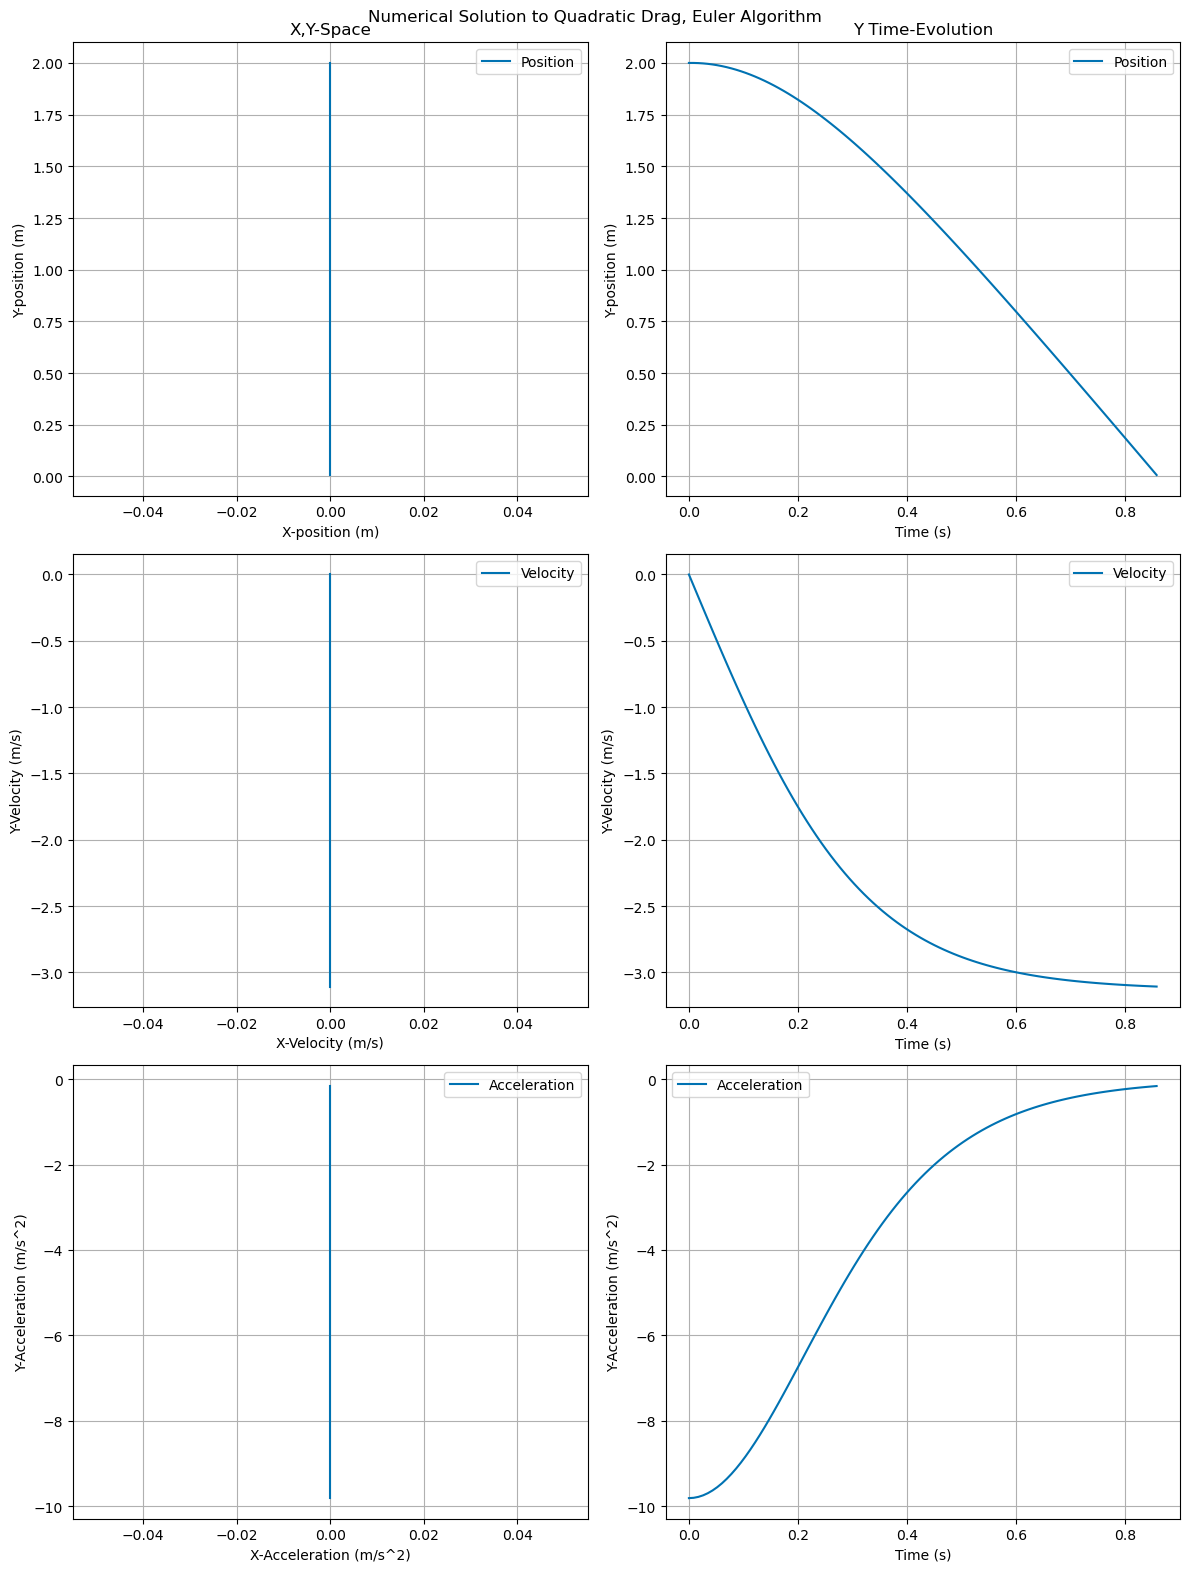

In [35]:
#Initialize given variables
m = 0.2
g = 9.81
D = 0.2
t_0 = 0
t_f = 0.858
N = 100
t_aray,dt = np.linspace(t_0,t_f,N,endpoint=True,retstep=True)
#gives 99 values between t_0 and t_f, along with t_f at 
# the end, and retstep=True outputs the step size to
# dt.

r_aray = np.zeros((N,2))
v_aray = np.zeros((N,2))
a_aray = np.zeros((N,2))

r_aray[0] = [0,2]
v_aray[0] = [0,0]
a_aray[0] = [(-D*np.linalg.norm(v_aray[0])*v_aray[0][0])/m,
             -g-(D*np.linalg.norm(v_aray[0])*v_aray[0][1])/m]

for i in range(1,N):
    r_aray[i] = r_aray[i-1]+v_aray[i-1]*dt
    v_aray[i] = v_aray[i-1]+a_aray[i-1]*dt
    a_aray[i] = a_vec(v_aray[i])
#for loop that updates our stuff.

r_aray = r_aray.transpose()
v_aray = v_aray.transpose()
a_aray = a_aray.transpose()

#plot them
fig, ax = plt.subplots(3,2,figsize=(12,16))
fig.suptitle("Numerical Solution to Quadratic Drag, Euler Algorithm")

ax[0][0].set_title("X,Y-Space")

ax[0][0].plot(r_aray[0],r_aray[1], label ="Position")
ax[0][0].set_ylabel("Y-position (m)")
ax[0][0].set_xlabel("X-position (m)")
ax[0][0].legend()
ax[0][0].grid(True)

ax[1][0].plot(v_aray[0],v_aray[1], label ="Velocity")
ax[1][0].set_ylabel("Y-Velocity (m/s)")
ax[1][0].set_xlabel("X-Velocity (m/s)")
ax[1][0].legend()
ax[1][0].grid(True)

ax[2][0].plot(a_aray[0],a_aray[1], label ="Acceleration")
ax[2][0].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][0].set_xlabel("X-Acceleration (m/s^2)")
ax[2][0].legend()
ax[2][0].grid(True)

ax[0][1].set_title("Y Time-Evolution")

ax[0][1].plot(t_aray,r_aray[1], label ="Position")
ax[0][1].set_ylabel("Y-position (m)")
ax[0][1].set_xlabel("Time (s)")
ax[0][1].legend()
ax[0][1].grid(True)

ax[1][1].plot(t_aray,v_aray[1], label ="Velocity")
ax[1][1].set_ylabel("Y-Velocity (m/s)")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].legend()
ax[1][1].grid(True)

ax[2][1].plot(t_aray,a_aray[1], label ="Acceleration")
ax[2][1].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][1].set_xlabel("Time (s)")
ax[2][1].legend()
ax[2][1].grid(True)


plt.tight_layout()
plt.show()


This is a pretty good approximation of our analytical solution. We then increase the count to 1000.

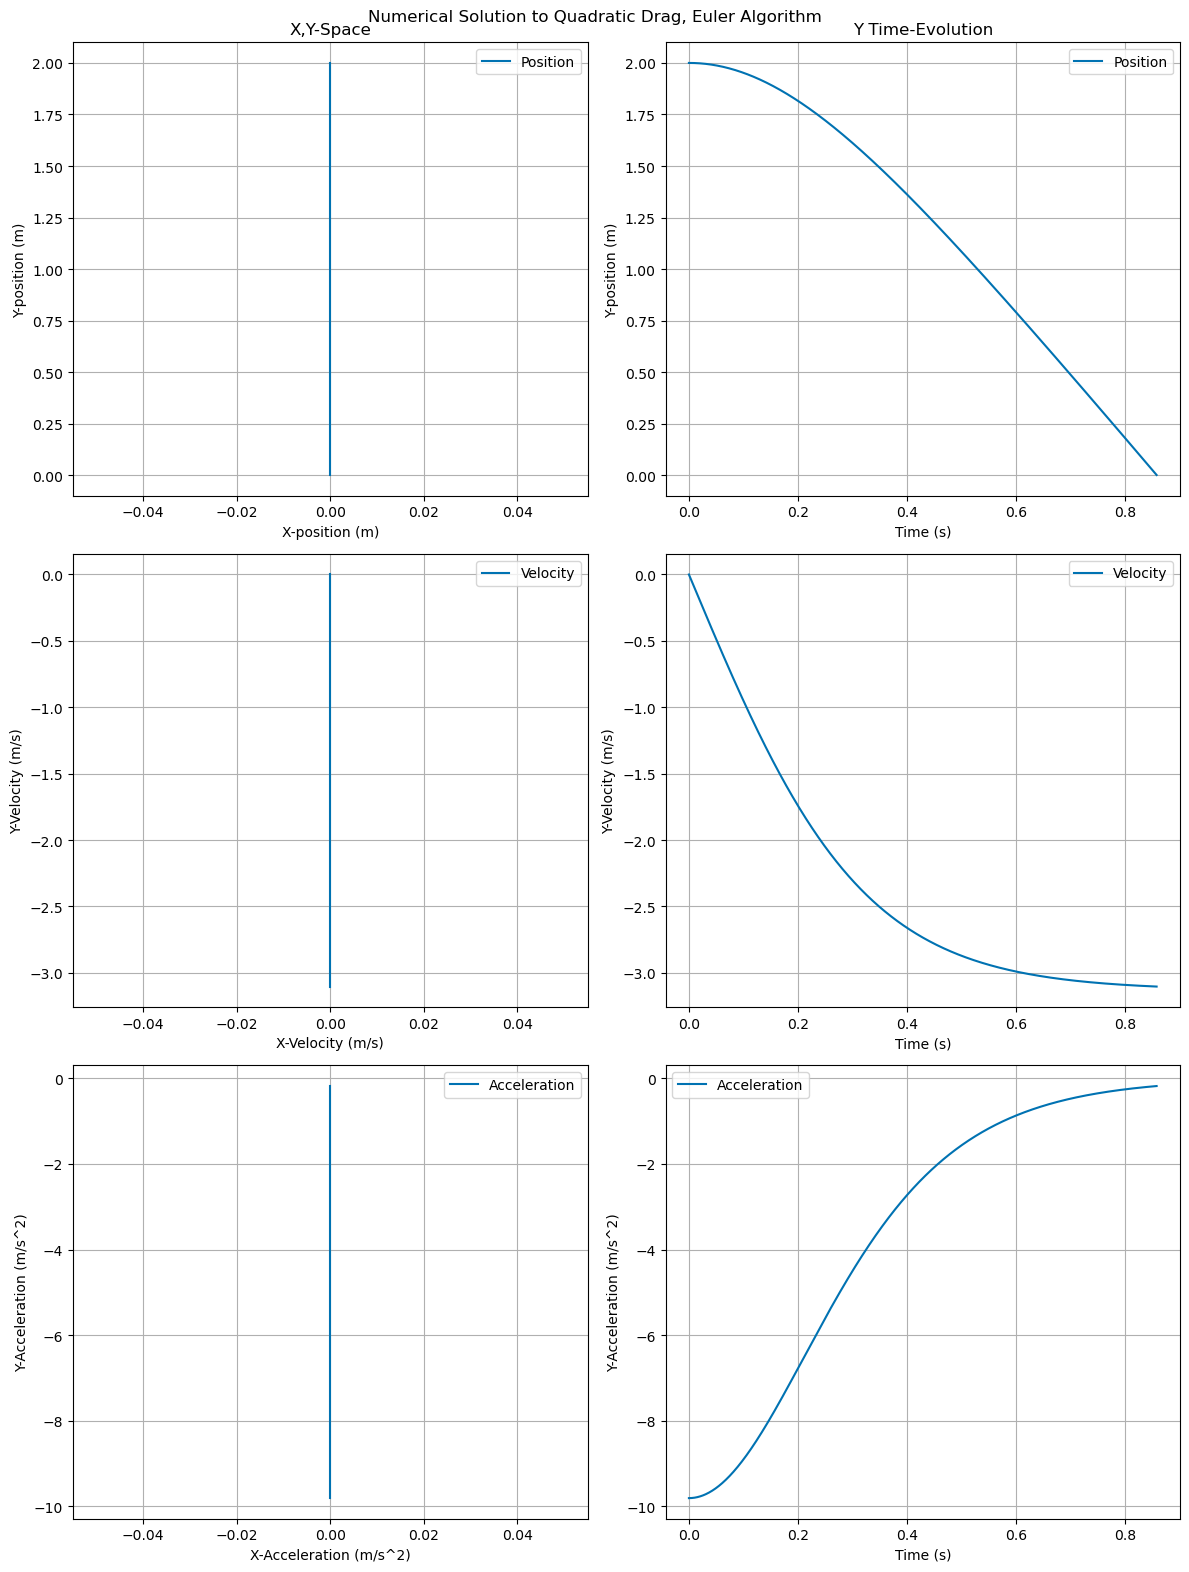

In [36]:
#Initialize given variables
m = 0.2
g = 9.81
D = 0.2
t_0 = 0
t_f = 0.858
N = 1000
t_aray,dt = np.linspace(t_0,t_f,N,endpoint=True,retstep=True)
#gives 99 values between t_0 and t_f, along with t_f at 
# the end, and retstep=True outputs the step size to
# dt.

r_aray = np.zeros((N,2))
v_aray = np.zeros((N,2))
a_aray = np.zeros((N,2))

r_aray[0] = [0,2]
v_aray[0] = [0,0]
a_aray[0] = [(-D*np.linalg.norm(v_aray[0])*v_aray[0][0])/m,
             -g-(D*np.linalg.norm(v_aray[0])*v_aray[0][1])/m]

for i in range(1,N):
    r_aray[i] = r_aray[i-1]+v_aray[i-1]*dt
    v_aray[i] = v_aray[i-1]+a_aray[i-1]*dt
    a_aray[i] = a_vec(v_aray[i])
#for loop that updates our stuff.

r_aray = r_aray.transpose()
v_aray = v_aray.transpose()
a_aray = a_aray.transpose()

#plot them
fig, ax = plt.subplots(3,2,figsize=(12,16))
fig.suptitle("Numerical Solution to Quadratic Drag, Euler Algorithm")

ax[0][0].set_title("X,Y-Space")

ax[0][0].plot(r_aray[0],r_aray[1], label ="Position")
ax[0][0].set_ylabel("Y-position (m)")
ax[0][0].set_xlabel("X-position (m)")
ax[0][0].legend()
ax[0][0].grid(True)

ax[1][0].plot(v_aray[0],v_aray[1], label ="Velocity")
ax[1][0].set_ylabel("Y-Velocity (m/s)")
ax[1][0].set_xlabel("X-Velocity (m/s)")
ax[1][0].legend()
ax[1][0].grid(True)

ax[2][0].plot(a_aray[0],a_aray[1], label ="Acceleration")
ax[2][0].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][0].set_xlabel("X-Acceleration (m/s^2)")
ax[2][0].legend()
ax[2][0].grid(True)

ax[0][1].set_title("Y Time-Evolution")

ax[0][1].plot(t_aray,r_aray[1], label ="Position")
ax[0][1].set_ylabel("Y-position (m)")
ax[0][1].set_xlabel("Time (s)")
ax[0][1].legend()
ax[0][1].grid(True)

ax[1][1].plot(t_aray,v_aray[1], label ="Velocity")
ax[1][1].set_ylabel("Y-Velocity (m/s)")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].legend()
ax[1][1].grid(True)

ax[2][1].plot(t_aray,a_aray[1], label ="Acceleration")
ax[2][1].set_ylabel("Y-Acceleration (m/s^2)")
ax[2][1].set_xlabel("Time (s)")
ax[2][1].legend()
ax[2][1].grid(True)


plt.tight_layout()
plt.show()

#### 6c
Compare your numerically obtained positions and velocities with the analytical results from exercise 5. In order to do this, you need to take out the motion in the 
x-direction. Comment again your results.

We will do this by taking the two numerical solutions and for each element of their arrays, and subtracting the corresponding element of the analytical solution. For this we will calculate analytical solution for $N=100$ and $N=1000$, and then calculate numerical solutions for $N=100$ and $N=1000$, and graph the resulting differences.

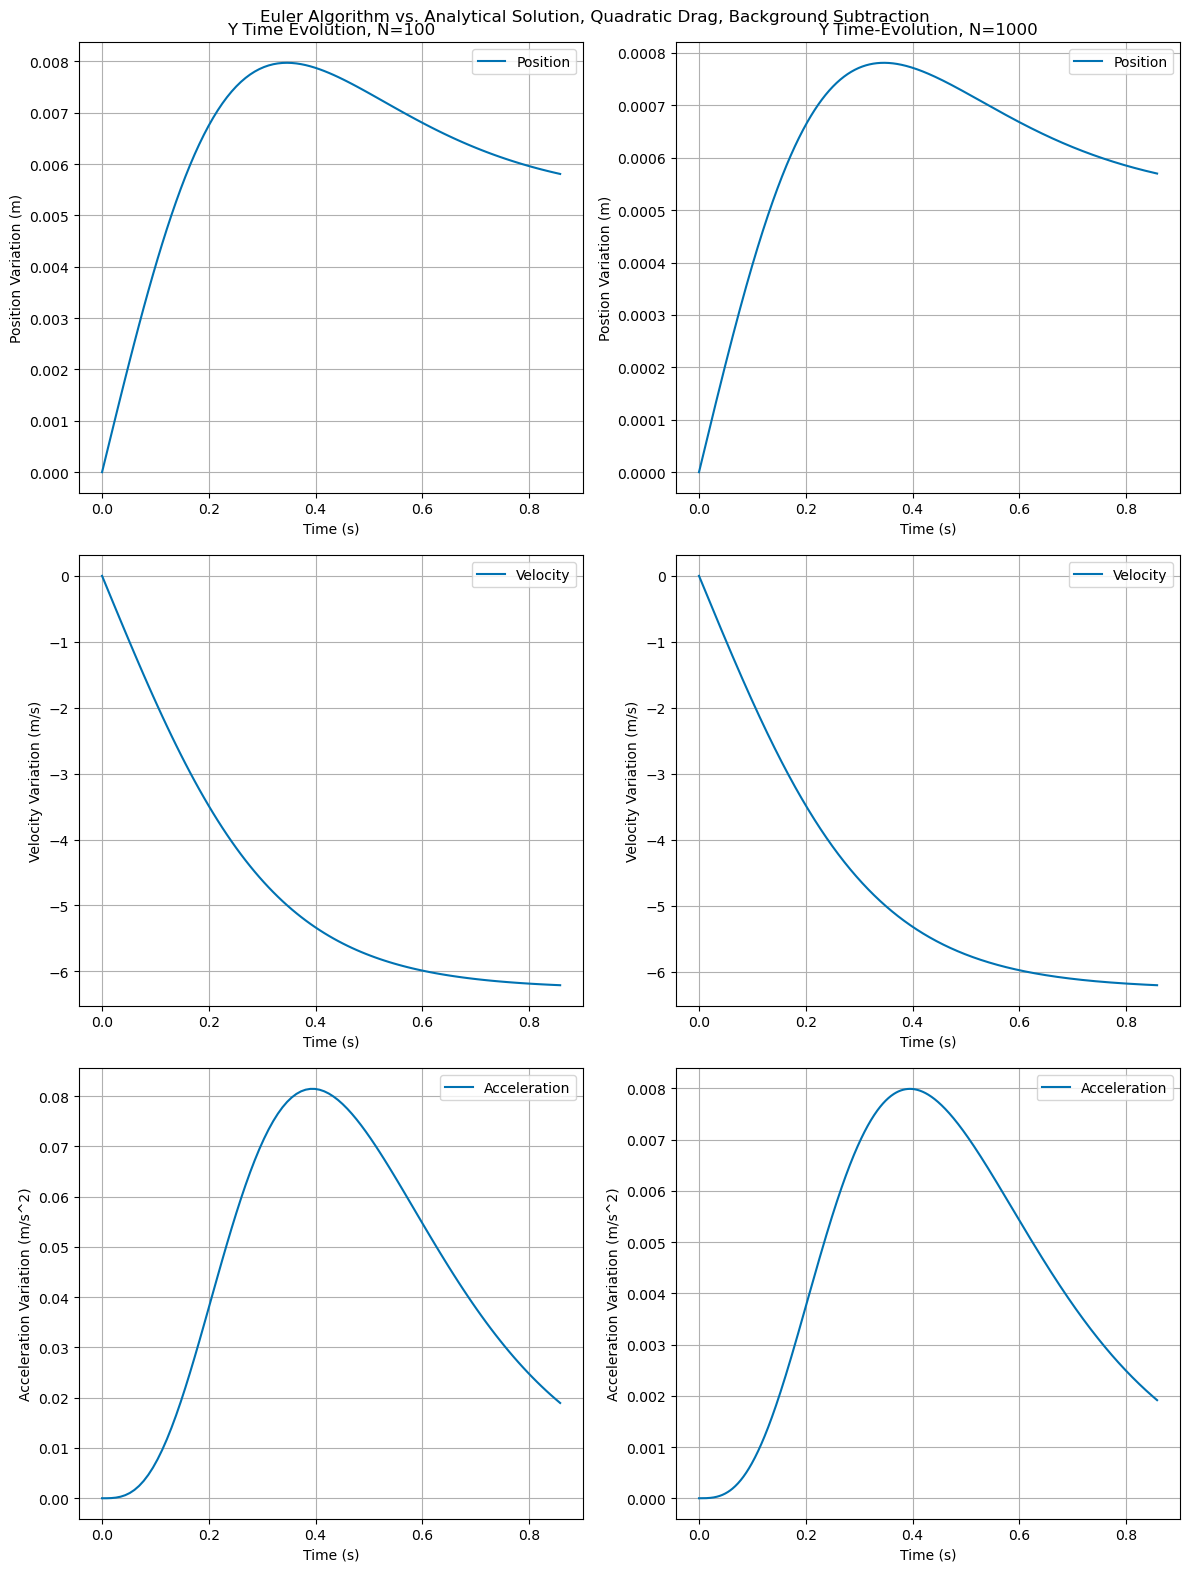

In [41]:
m = 0.2
g = 9.81
D = 0.2
t_0 = 0
t_f = 0.858
N_1 = 100
N_2 = 1000
t_aray_1,dt_1 = np.linspace(t_0,t_f,N_1,endpoint=True,retstep=True)
t_aray_2,dt_2 = np.linspace(t_0,t_f,N_2,endpoint=True,retstep=True)

y_pos_aray = np.zeros(N_1)
y_pos_aray_2 = np.zeros(N_2)
y_vel_aray = np.zeros(N_1)
y_vel_aray_2 = np.zeros(N_2)
y_acc_aray = np.zeros(N_1)
y_acc_aray_2 = np.zeros(N_2)

y_pos_aray[0] = 2
y_pos_aray_2[0]=2
y_acc_aray[0] = -g + -(D*y_vel_aray[0]*np.sqrt(y_vel_aray[0]**2))/m
y_acc_aray_2[0] = -g + -(D*y_vel_aray_2[0]*np.sqrt(y_vel_aray_2[0]**2))/m

r_aray = np.zeros((N_1,2))
v_aray = np.zeros((N_1,2))
a_aray = np.zeros((N_1,2))

r_aray_2 = np.zeros((N_2,2))
v_aray_2 = np.zeros((N_2,2))
a_aray_2 = np.zeros((N_2,2))

r_aray[0] = [0,2]
v_aray[0] = [0,0]
a_aray[0] = [(-D*np.linalg.norm(v_aray[0])*v_aray[0][0])/m,
             -g-(D*np.linalg.norm(v_aray[0])*v_aray[0][1])/m]

r_aray_2[0] = [0,2]
v_aray_2[0] = [0,0]
a_aray_2[0] = [(-D*np.linalg.norm(v_aray_2[0])*v_aray_2[0][0])/m,
             -g-(D*np.linalg.norm(v_aray_2[0])*v_aray_2[0][1])/m]

for i in range(1,N_1):
    y_pos_aray[i] = -(m/D)*np.log(np.cosh(t_aray_1[i]*np.sqrt(g*D/m)))+2
    y_acc_aray[i] = g*((np.tanh(t_aray_1[i]*np.sqrt(g*D/m)))**2-1)
    y_vel_aray[i] = np.sqrt(m*g/D)*np.tanh(t_aray_1[i]*np.sqrt(g*D/m))
    r_aray[i] = r_aray[i-1]+v_aray[i-1]*dt_1
    v_aray[i] = v_aray[i-1]+a_aray[i-1]*dt_1
    a_aray[i] = a_vec(v_aray[i])
for i in range(1,N_2):
    y_pos_aray_2[i] = -(m/D)*np.log(np.cosh(t_aray_2[i]*np.sqrt(g*D/m)))+2
    y_acc_aray_2[i] = g*((np.tanh(t_aray_2[i]*np.sqrt(g*D/m)))**2-1)
    y_vel_aray_2[i] = np.sqrt(m*g/D)*np.tanh(t_aray_2[i]*np.sqrt(g*D/m))
    v_aray_2[i] = v_aray_2[i-1]+a_aray_2[i-1]*dt_2
    r_aray_2[i] = r_aray_2[i-1]+v_aray_2[i-1]*dt_2
    a_aray_2[i] = a_vec(v_aray_2[i])

for i in range(0,N_1):
    r_aray[i][1] = r_aray[i][1]-y_pos_aray[i]
    v_aray[i][1] = v_aray[i][1]-y_vel_aray[i]
    a_aray[i][1] = a_aray[i][1]-y_acc_aray[i]

for i in range(0,N_2):
    r_aray_2[i][1] = r_aray_2[i][1]-y_pos_aray_2[i]
    v_aray_2[i][1] = v_aray_2[i][1]-y_vel_aray_2[i]
    a_aray_2[i][1] = a_aray_2[i][1]-y_acc_aray_2[i]

r_aray = r_aray.transpose()
v_aray = v_aray.transpose()
a_aray = a_aray.transpose()

r_aray_2 = r_aray_2.transpose()
v_aray_2 = v_aray_2.transpose()
a_aray_2 = a_aray_2.transpose()

fig, ax = plt.subplots(3,2,figsize=(12,16))
fig.suptitle("Euler Algorithm vs. Analytical Solution, Quadratic Drag, Background Subtraction")

ax[0][0].set_title("Y Time Evolution, N=100")

ax[0][0].plot(t_aray_1,r_aray[1], label ="Position")
ax[0][0].set_ylabel("Position Variation (m)")
ax[0][0].set_xlabel("Time (s)")
ax[0][0].legend()
ax[0][0].grid(True)

ax[1][0].plot(t_aray_1,v_aray[1], label ="Velocity")
ax[1][0].set_ylabel("Velocity Variation (m/s)")
ax[1][0].set_xlabel("Time (s)")
ax[1][0].legend()
ax[1][0].grid(True)

ax[2][0].plot(t_aray_1,a_aray[1], label ="Acceleration")
ax[2][0].set_ylabel("Acceleration Variation (m/s^2)")
ax[2][0].set_xlabel("Time (s)")
ax[2][0].legend()
ax[2][0].grid(True)


ax[0][1].set_title("Y Time-Evolution, N=1000")

ax[0][1].plot(t_aray_2,r_aray_2[1], label ="Position")
ax[0][1].set_ylabel("Postion Variation (m)")
ax[0][1].set_xlabel("Time (s)")
ax[0][1].legend()
ax[0][1].grid(True)

ax[1][1].plot(t_aray_2,v_aray_2[1], label ="Velocity")
ax[1][1].set_ylabel("Velocity Variation (m/s)")
ax[1][1].set_xlabel("Time (s)")
ax[1][1].legend()
ax[1][1].grid(True)

ax[2][1].plot(t_aray_2,a_aray_2[1], label ="Acceleration")
ax[2][1].set_ylabel("Acceleration Variation (m/s^2)")
ax[2][1].set_xlabel("Time (s)")
ax[2][1].legend()
ax[2][1].grid(True)


plt.tight_layout(h_pad=1.4)
plt.show()


We can see that both iterations become more inaccurate in velocity over time, to a similar degree. We also note that both iterations have a maximal variation in acceleration and position between $t=0.3$ and $t=0.4$, however the $N=1000$ iteration seems to be almost exactly an order of magnitude more accurate in both cases.